#  Исследование колличества населения  по фактическим и прогнозируемым данным. 

План:

1 Импорт библиотек

2 Загрузка и проверка данных

3 Исправление 

4 Категоризация

5 Разделение фактических и прогнозируемых данных

6 Исследование данных

##  Загрузка и обработка данных.

###  Импорт библиотек

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pprint
from pymystem3 import Mystem
from collections import Counter


from sklearn.preprocessing import LabelEncoder

import seaborn as sns
sns.set(rc={'figure.figsize':(16, 9)})

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings('ignore')



### Загрузка и обработка данных

In [2]:
try:
    data = pd.read_csv('forFBpost.csv', sep=';')
except:
    raise

    
data.columns = data.columns.str.lower()

dt = [data]
for df in dt:   
    print('Датафрейм')
    print('-'*80)
    display(data)
    print('-'*80)
    print('Размер датафрейма: (строк:столбцов) {}'.format(data.shape))
    print('-'*80)
    print('Типы данных и общая информация')
    print(data.info())
    print('-'*80)
    print('Наличие дубликатов: {}'.format(data.duplicated().sum()))
    print('-'*80)
    print('Наличие пропусков')
    print('-'*80)
    print(data.isna().sum())
    print('Стат данные')
    print('-'*80)
    display(data.describe().T)    

Датафрейм
--------------------------------------------------------------------------------


город  year  fact    модель  нижняя граница  верхняя граница
0      Белокуриха  2000   NaN 15,400.00       15,100.00        15,700.00
1      Белокуриха  2001   NaN 15,400.00       15,100.00        15,700.00
2      Белокуриха  2002   NaN 15,400.00       15,000.00        15,700.00
3      Белокуриха  2003   NaN 15,300.00       15,000.00        15,700.00
4      Белокуриха  2004   NaN 15,300.00       14,900.00        15,600.00
...           ...   ...   ...       ...             ...              ...
30245     Облучье  2116   NaN    300.00          100.00           800.00
30246     Облучье  2117   NaN    300.00          100.00           800.00
30247     Облучье  2118   NaN    300.00          100.00           800.00
30248     Облучье  2119   NaN    300.00          100.00           800.00
30249     Облучье  2120   NaN    300.00          100.00           800.00

[30250 rows x 6 columns]

--------------------------------------------------------------------------------
Размер датафрейма: (строк:столбцов) (30250, 6)
--------------------------------------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   город            30250 non-null  object 
 1   year             30250 non-null  int64  
 2   fact             3250 non-null   float64
 3   модель           30250 non-null  float64
 4   нижняя граница   30250 non-null  float64
 5   верхняя граница  30250 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB
None
--------------------------------------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------------------------------------
Наличие пропусков
---------------

count       mean        std      min       25%       50%  \
year            30,250.00   2,060.00      34.93 2,000.00  2,030.00  2,060.00   
fact             3,250.00 127,138.17 767,593.06 2,370.00 15,831.00 33,875.00   
модель          30,250.00 140,216.82 886,619.25     0.00 11,700.00 27,900.00   
нижняя граница  30,250.00 138,798.12 881,804.44     0.00 11,400.00 27,400.00   
верхняя граница 30,250.00 141,730.43 891,467.78   400.00 12,000.00 28,400.00   

                      75%           max  
year             2,090.00      2,120.00  
fact            72,760.00 12,678,079.00  
модель          74,100.00 15,419,400.00  
нижняя граница  72,900.00 15,304,200.00  
верхняя граница 75,600.00 15,535,500.00

1 В целом данные корректны

2 Типы данных так же корректны

3 В столбце fact есть 27000 пропусков. Заполнить пропуски не представляется возможным, а проводить иследовние на них будет не корректно. Принято решение удалить столбец.

### Удаление столбца

In [3]:
data = data.drop(columns=['fact'], axis=1)
data

город  year    модель  нижняя граница  верхняя граница
0      Белокуриха  2000 15,400.00       15,100.00        15,700.00
1      Белокуриха  2001 15,400.00       15,100.00        15,700.00
2      Белокуриха  2002 15,400.00       15,000.00        15,700.00
3      Белокуриха  2003 15,300.00       15,000.00        15,700.00
4      Белокуриха  2004 15,300.00       14,900.00        15,600.00
...           ...   ...       ...             ...              ...
30245     Облучье  2116    300.00          100.00           800.00
30246     Облучье  2117    300.00          100.00           800.00
30247     Облучье  2118    300.00          100.00           800.00
30248     Облучье  2119    300.00          100.00           800.00
30249     Облучье  2120    300.00          100.00           800.00

[30250 rows x 5 columns]

### Распределение

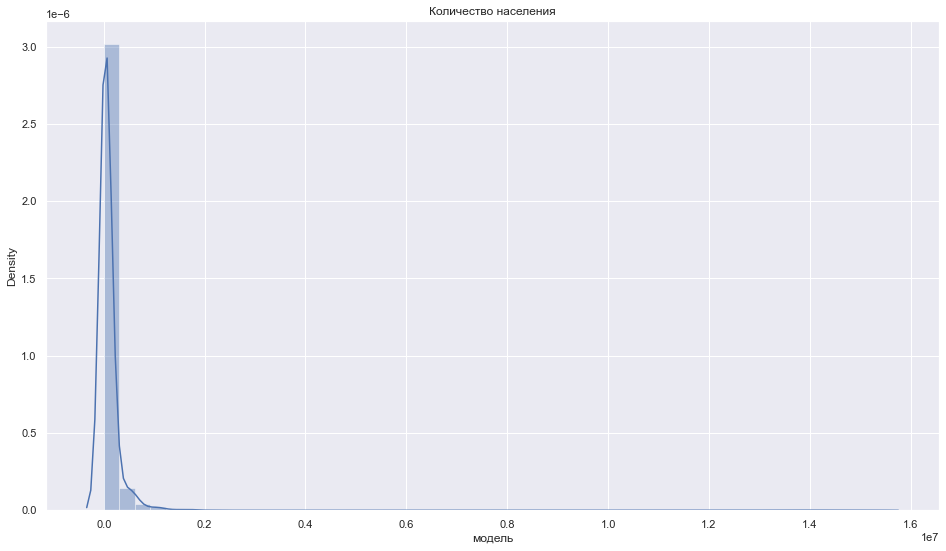

In [4]:
plt.title('Количество населения')
ax = sns.distplot(data['модель'], bins=50)
plt.show()

## Категоризация

Классификация населённых пунктов взята из Википедии.

In [21]:
def group(модель):
    if модель <= 300:
        return 'Малое поселение'
    if модель <= 1000:
        return 'Среднее поселение'
    if модель <= 3000:
        return 'Большое поселение'
    if модель <= 5000:    
        return 'Крупное поселение'
    if модель <= 10000:
        return 'Поселение городского типа'
    if модель <= 20000:
        return 'Малый город'
    if модель <= 100000:
        return 'Средний город'
    if модель <= 500000:
        return 'Крупный город'
    if модель <= 999999:
        return 'Крупнейший город'
    return 'Миллионники'

data['group'] = data['модель'].apply(group)
display(data)


город  year    модель  нижняя граница  верхняя граница  \
0      Белокуриха  2000 15,400.00       15,100.00        15,700.00   
1      Белокуриха  2001 15,400.00       15,100.00        15,700.00   
2      Белокуриха  2002 15,400.00       15,000.00        15,700.00   
3      Белокуриха  2003 15,300.00       15,000.00        15,700.00   
4      Белокуриха  2004 15,300.00       14,900.00        15,600.00   
...           ...   ...       ...             ...              ...   
30245     Облучье  2116    300.00          100.00           800.00   
30246     Облучье  2117    300.00          100.00           800.00   
30247     Облучье  2118    300.00          100.00           800.00   
30248     Облучье  2119    300.00          100.00           800.00   
30249     Облучье  2120    300.00          100.00           800.00   

                 group  
0          Малый город  
1          Малый город  
2          Малый город  
3          Малый город  
4          Малый город  
...                ...  
30245  Малое поселение  
30246  Малое поселение  
30247  Малое поселение  
30248  Малое поселение  
30249  Малое поселение  

[30250 rows x 6 columns]

## Разделение данных на фактические и прогнозируемые

In [6]:
real = data.query('year <= 2022')

future = data.query('year > 2022')

display('Данные с 2000 по 2022 год',real)
display('Прогнозируемые данные', future)

'Данные с 2000 по 2022 год'

город  year    модель  нижняя граница  верхняя граница  \
0      Белокуриха  2000 15,400.00       15,100.00        15,700.00   
1      Белокуриха  2001 15,400.00       15,100.00        15,700.00   
2      Белокуриха  2002 15,400.00       15,000.00        15,700.00   
3      Белокуриха  2003 15,300.00       15,000.00        15,700.00   
4      Белокуриха  2004 15,300.00       14,900.00        15,600.00   
...           ...   ...       ...             ...              ...   
30147     Облучье  2018  9,800.00        9,400.00        10,100.00   
30148     Облучье  2019  9,700.00        9,400.00        10,000.00   
30149     Облучье  2020  9,600.00        9,300.00        10,000.00   
30150     Облучье  2021  9,500.00        9,200.00         9,800.00   
30151     Облучье  2022  9,400.00        9,000.00         9,700.00   

                           group  
0                    Малый город  
1                    Малый город  
2                    Малый город  
3                    Малый город  
4                    Малый город  
...                          ...  
30147  Поселение городского типа  
30148  Поселение городского типа  
30149  Поселение городского типа  
30150  Поселение городского типа  
30151  Поселение городского типа  

[5750 rows x 6 columns]

'Прогнозируемые данные'

город  year    модель  нижняя граница  верхняя граница  \
23     Белокуриха  2023 15,400.00       15,100.00        15,800.00   
24     Белокуриха  2024 15,600.00       15,200.00        15,900.00   
25     Белокуриха  2025 15,700.00       15,300.00        16,000.00   
26     Белокуриха  2026 15,800.00       15,500.00        16,100.00   
27     Белокуриха  2027 15,900.00       15,600.00        16,200.00   
...           ...   ...       ...             ...              ...   
30245     Облучье  2116    300.00          100.00           800.00   
30246     Облучье  2117    300.00          100.00           800.00   
30247     Облучье  2118    300.00          100.00           800.00   
30248     Облучье  2119    300.00          100.00           800.00   
30249     Облучье  2120    300.00          100.00           800.00   

                 group  
23         Малый город  
24         Малый город  
25         Малый город  
26         Малый город  
27         Малый город  
...                ...  
30245  Малое поселение  
30246  Малое поселение  
30247  Малое поселение  
30248  Малое поселение  
30249  Малое поселение  

[24500 rows x 6 columns]

## Исследование

###  Малое поселение

'Настоящее время'

Empty DataFrame
Columns: [город, year, модель, нижняя граница, верхняя граница, group]
Index: []

'Прогнозируемое'

город  year  модель  нижняя граница  верхняя граница  \
2043   Сольвычегодск  2107  300.00          200.00           500.00   
2044   Сольвычегодск  2108  300.00          200.00           500.00   
2045   Сольвычегодск  2109  300.00          200.00           500.00   
2046   Сольвычегодск  2110  300.00          200.00           500.00   
2047   Сольвычегодск  2111  300.00          200.00           500.00   
...              ...   ...     ...             ...              ...   
30245        Облучье  2116  300.00          100.00           800.00   
30246        Облучье  2117  300.00          100.00           800.00   
30247        Облучье  2118  300.00          100.00           800.00   
30248        Облучье  2119  300.00          100.00           800.00   
30249        Облучье  2120  300.00          100.00           800.00   

                 group  
2043   Малое поселение  
2044   Малое поселение  
2045   Малое поселение  
2046   Малое поселение  
2047   Малое поселение  
...                ...  
30245  Малое поселение  
30246  Малое поселение  
30247  Малое поселение  
30248  Малое поселение  
30249  Малое поселение  

[275 rows x 6 columns]

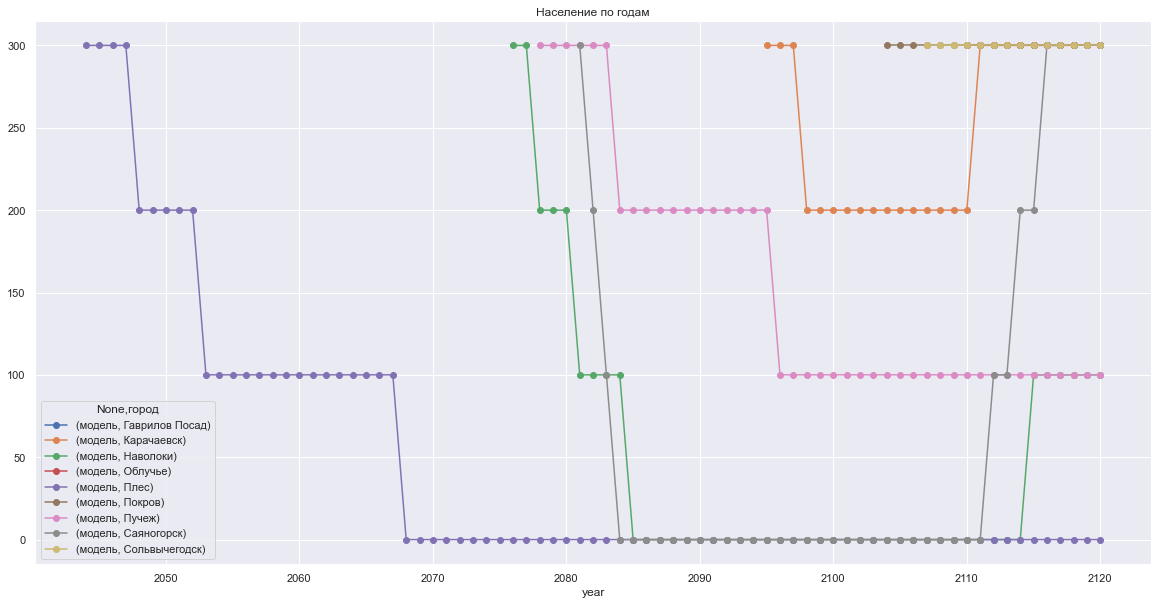

In [7]:
real_mp = real.query('group == "Малое поселение"')
display('Настоящее время', real_mp)

future_mp = future.query('group == "Малое поселение"')
display('Прогнозируемое', future_mp)

pivot_future_mp = future_mp.pivot_table(index=['город', 'year'], values=['модель'])
pivot_future_mp = pivot_future_mp.unstack('город')

pivot_future_mp.plot(style='o-', title='Население по годам', figsize=(20, 10))


plt.show()

1 Населённых пунктов с количеством населения <= 300 человек в фактических данных нет.

2 По прогнозам в таких населённых пунктах количество населения будет уменьшаться.

### Среднее поселение

'Настоящее время'

город  year   модель  нижняя граница  верхняя граница              group
7865  Плес  2000   700.00          500.00         1,100.00  Среднее поселение
7866  Плес  2001   800.00          600.00         1,100.00  Среднее поселение
7867  Плес  2002   900.00          600.00         1,200.00  Среднее поселение
7868  Плес  2003 1,000.00          800.00         1,300.00  Среднее поселение

'Прогнозируемое'

город  year   модель  нижняя граница  верхняя граница  \
2004   Сольвычегодск  2068 1,000.00          900.00         1,200.00   
2005   Сольвычегодск  2069 1,000.00          900.00         1,100.00   
2006   Сольвычегодск  2070 1,000.00          900.00         1,100.00   
2007   Сольвычегодск  2071   900.00          800.00         1,100.00   
2008   Сольвычегодск  2072   900.00          800.00         1,000.00   
...              ...   ...      ...             ...              ...   
30234        Облучье  2105   400.00          200.00           900.00   
30235        Облучье  2106   400.00          200.00           900.00   
30236        Облучье  2107   400.00          200.00           900.00   
30237        Облучье  2108   400.00          100.00           900.00   
30238        Облучье  2109   400.00          100.00           900.00   

                   group  
2004   Среднее поселение  
2005   Среднее поселение  
2006   Среднее поселение  
2007   Среднее поселение  
2008   Среднее поселение  
...                  ...  
30234  Среднее поселение  
30235  Среднее поселение  
30236  Среднее поселение  
30237  Среднее поселение  
30238  Среднее поселение  

[525 rows x 6 columns]

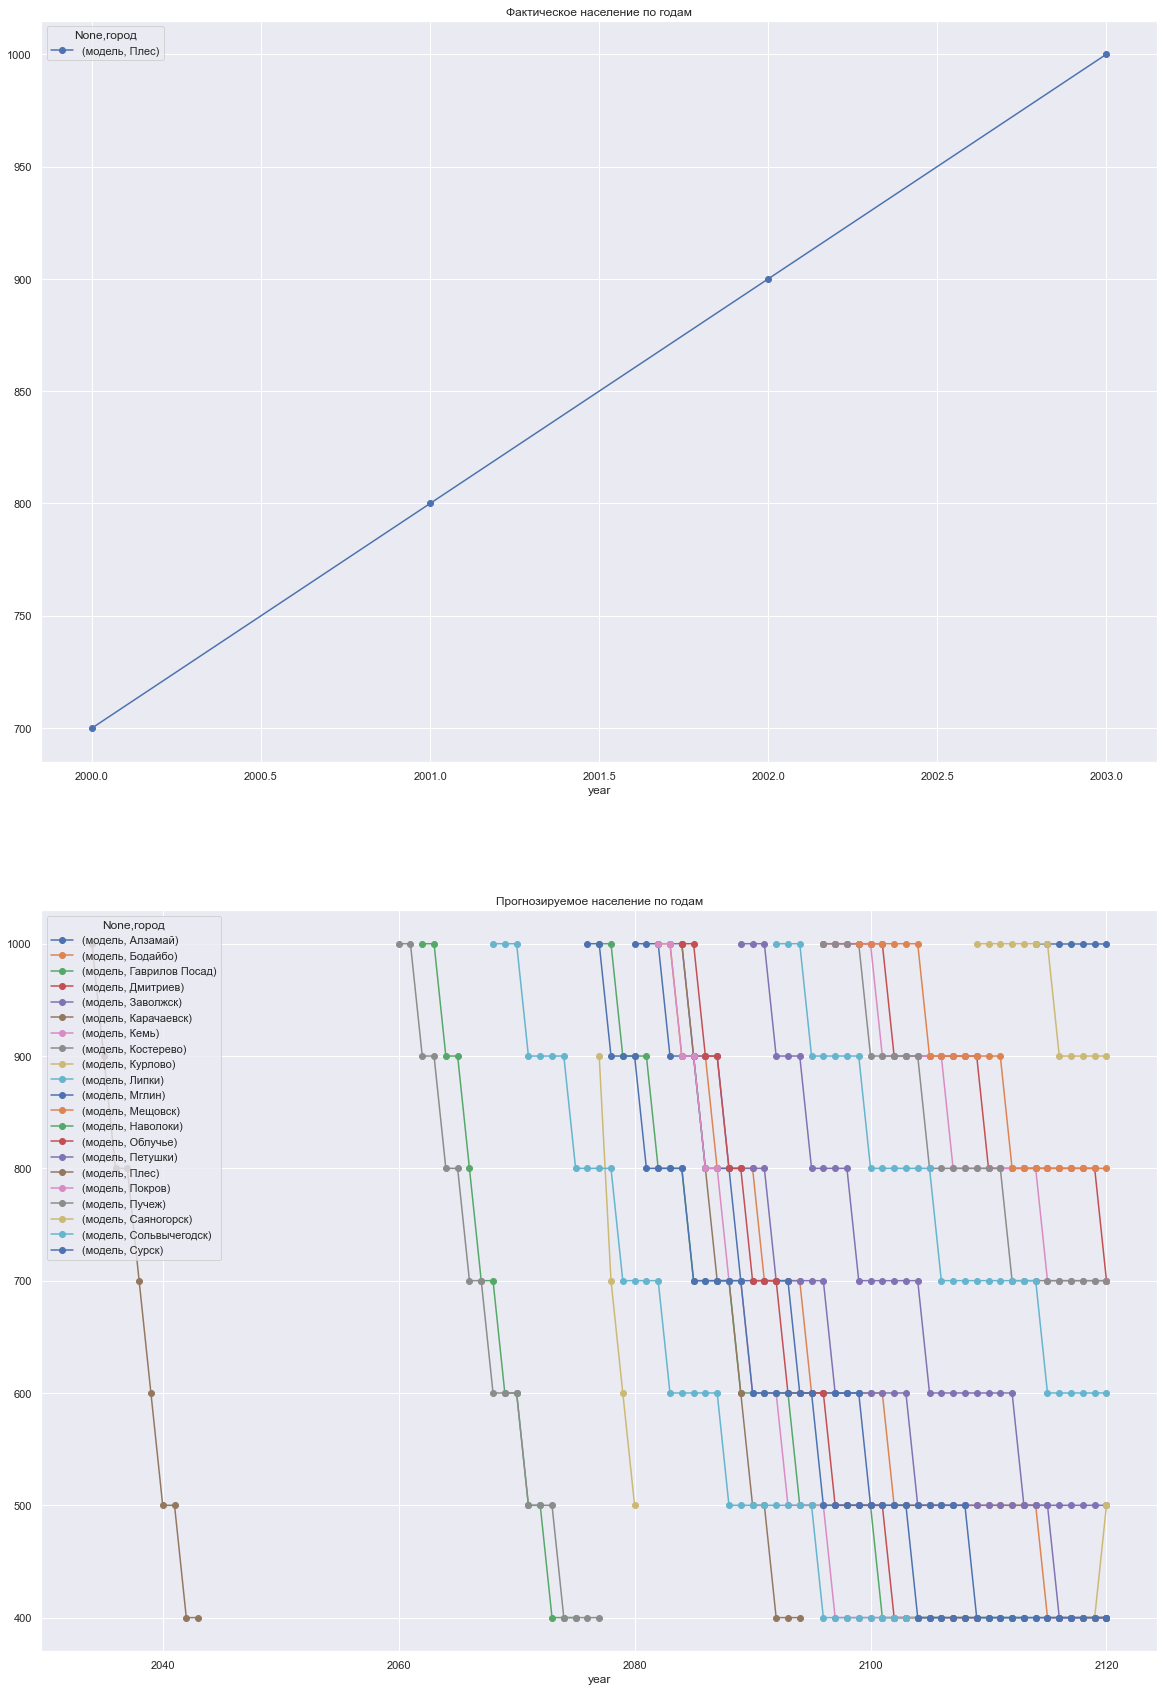

In [8]:
real_sp = real.query('group == "Среднее поселение"')
display('Настоящее время', real_sp)

future_sp = future.query('group == "Среднее поселение"')
display('Прогнозируемое', future_sp)



def grafik(x, y):
    pivot_x = x.pivot_table(index=['город', 'year'], values=['модель'])
    pivot_x = pivot_x.unstack('город')

    pivot_y = y.pivot_table(index=['город', 'year'], values=['модель'])
    pivot_y = pivot_y.unstack('город')

    plt.figure(figsize=(20, 30)) 
    ax1 = plt.subplot(2, 1, 1)
    pivot_x.plot(style='o-', title='Фактическое население по годам', ax=ax1)
    ax2 = plt.subplot(2, 1, 2)
    pivot_y.plot(style='o-', title='Прогнозируемое население по годам', ax=ax2)
    


    plt.show()
    
grafik(real_sp, future_sp)    

1 С количеством населения <= 1000 в фактических данных есть один пункт. С 2000 по 2003 года население устойчиво росло.

2 По прогнозам количество населения в средних поселениях будет падать.

###  Большое поселение

'Настоящее время'

город  year   модель  нижняя граница  верхняя граница              group
7869  Плес  2004 1,200.00          900.00         1,500.00  Большое поселение
7870  Плес  2005 1,400.00        1,100.00         1,700.00  Большое поселение
7871  Плес  2006 1,600.00        1,400.00         1,900.00  Большое поселение
7872  Плес  2007 1,900.00        1,600.00         2,200.00  Большое поселение
7873  Плес  2008 2,200.00        1,900.00         2,500.00  Большое поселение
7874  Плес  2009 2,400.00        2,200.00         2,700.00  Большое поселение
7875  Плес  2010 2,700.00        2,400.00         3,000.00  Большое поселение
7876  Плес  2011 2,900.00        2,600.00         3,200.00  Большое поселение
7877  Плес  2012 3,000.00        2,800.00         3,300.00  Большое поселение
7885  Плес  2020 2,900.00        2,700.00         3,200.00  Большое поселение
7886  Плес  2021 2,800.00        2,500.00         3,100.00  Большое поселение
7887  Плес  2022 2,700.00        2,400.00         2,900.00  Большое поселение

'Прогнозируемое'

город  year   модель  нижняя граница  верхняя граница  \
1967   Сольвычегодск  2031 3,000.00        2,900.00         3,100.00   
1968   Сольвычегодск  2032 2,900.00        2,800.00         3,000.00   
1969   Сольвычегодск  2033 2,800.00        2,700.00         2,900.00   
1970   Сольвычегодск  2034 2,700.00        2,700.00         2,800.00   
1971   Сольвычегодск  2035 2,700.00        2,600.00         2,800.00   
...              ...   ...      ...             ...              ...   
30208        Облучье  2079 1,300.00          900.00         1,700.00   
30209        Облучье  2080 1,200.00          900.00         1,700.00   
30210        Облучье  2081 1,200.00          800.00         1,600.00   
30211        Облучье  2082 1,100.00          800.00         1,600.00   
30212        Облучье  2083 1,100.00          700.00         1,500.00   

                   group  
1967   Большое поселение  
1968   Большое поселение  
1969   Большое поселение  
1970   Большое поселение  
1971   Большое поселение  
...                  ...  
30208  Большое поселение  
30209  Большое поселение  
30210  Большое поселение  
30211  Большое поселение  
30212  Большое поселение  

[1077 rows x 6 columns]

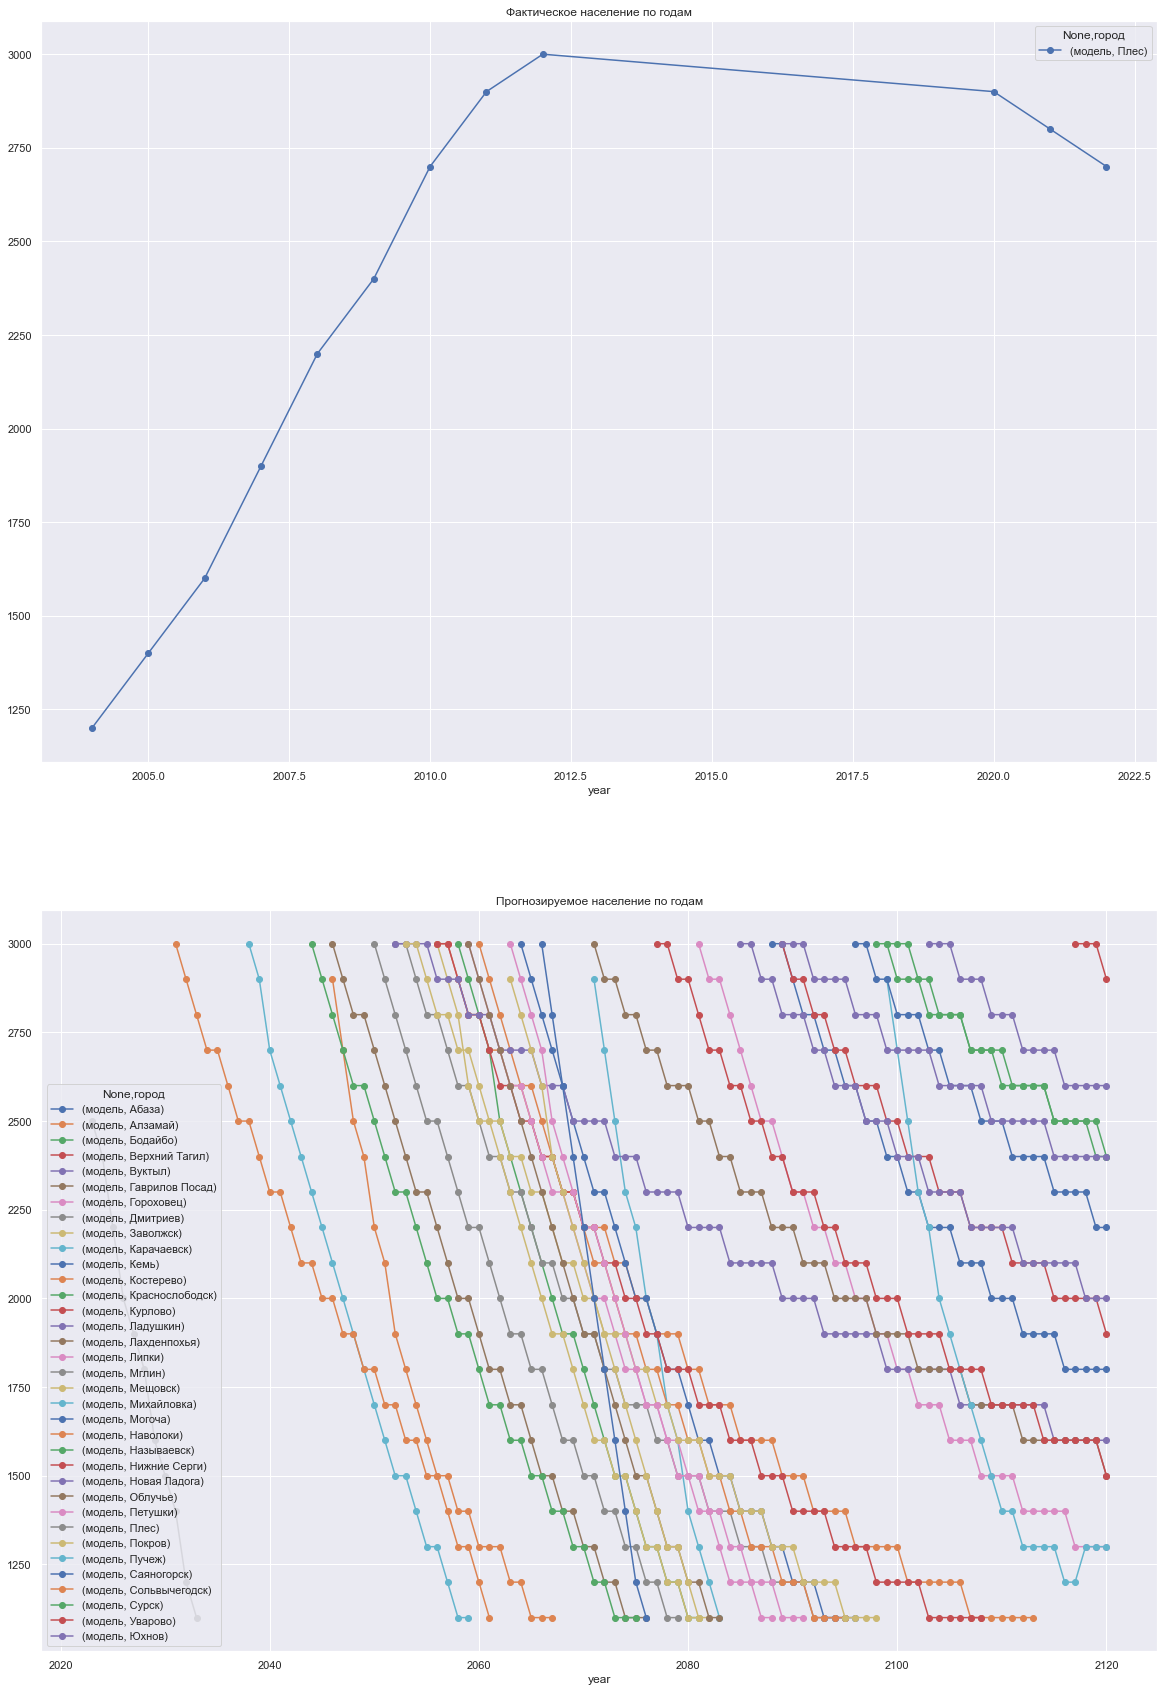

In [9]:
real_bp = real.query('group == "Большое поселение"')
display('Настоящее время', real_bp)

future_bp = future.query('group == "Большое поселение"')
display('Прогнозируемое', future_bp)

grafik(real_bp, future_bp)

1 По фактическим данным видно, что население Плёса к 2012 году достигло 3000 и дальше начало падать.

2 По прогнозу количество населения в больших поселениях так же будет падать.

###  Крупное поселение

'Настоящее время'

город  year   модель  нижняя граница  верхняя граница  \
1936   Сольвычегодск  2000 4,000.00        3,900.00         4,100.00   
1937   Сольвычегодск  2001 4,000.00        3,900.00         4,100.00   
1938   Сольвычегодск  2002 4,000.00        3,900.00         4,100.00   
1939   Сольвычегодск  2003 4,100.00        4,000.00         4,200.00   
1940   Сольвычегодск  2004 4,100.00        4,000.00         4,200.00   
...              ...   ...      ...             ...              ...   
10182       Ладушкин  2018 4,000.00        4,000.00         4,100.00   
10183       Ладушкин  2019 4,000.00        3,900.00         4,100.00   
10184       Ладушкин  2020 4,000.00        3,900.00         4,100.00   
10185       Ладушкин  2021 4,000.00        3,900.00         4,000.00   
10186       Ладушкин  2022 4,000.00        3,900.00         4,000.00   

                   group  
1936   Крупное поселение  
1937   Крупное поселение  
1938   Крупное поселение  
1939   Крупное поселение  
1940   Крупное поселение  
...                  ...  
10182  Крупное поселение  
10183  Крупное поселение  
10184  Крупное поселение  
10185  Крупное поселение  
10186  Крупное поселение  

[65 rows x 6 columns]

'Прогнозируемое'

город  year   модель  нижняя граница  верхняя граница  \
1959   Сольвычегодск  2023 3,700.00        3,600.00         3,800.00   
1960   Сольвычегодск  2024 3,600.00        3,600.00         3,700.00   
1961   Сольвычегодск  2025 3,500.00        3,500.00         3,600.00   
1962   Сольвычегодск  2026 3,400.00        3,400.00         3,500.00   
1963   Сольвычегодск  2027 3,300.00        3,300.00         3,400.00   
...              ...   ...      ...             ...              ...   
30183        Облучье  2054 3,700.00        3,300.00         4,100.00   
30184        Облучье  2055 3,500.00        3,200.00         3,900.00   
30185        Облучье  2056 3,400.00        3,000.00         3,800.00   
30186        Облучье  2057 3,300.00        2,900.00         3,700.00   
30187        Облучье  2058 3,200.00        2,800.00         3,600.00   

                   group  
1959   Крупное поселение  
1960   Крупное поселение  
1961   Крупное поселение  
1962   Крупное поселение  
1963   Крупное поселение  
...                  ...  
30183  Крупное поселение  
30184  Крупное поселение  
30185  Крупное поселение  
30186  Крупное поселение  
30187  Крупное поселение  

[1057 rows x 6 columns]

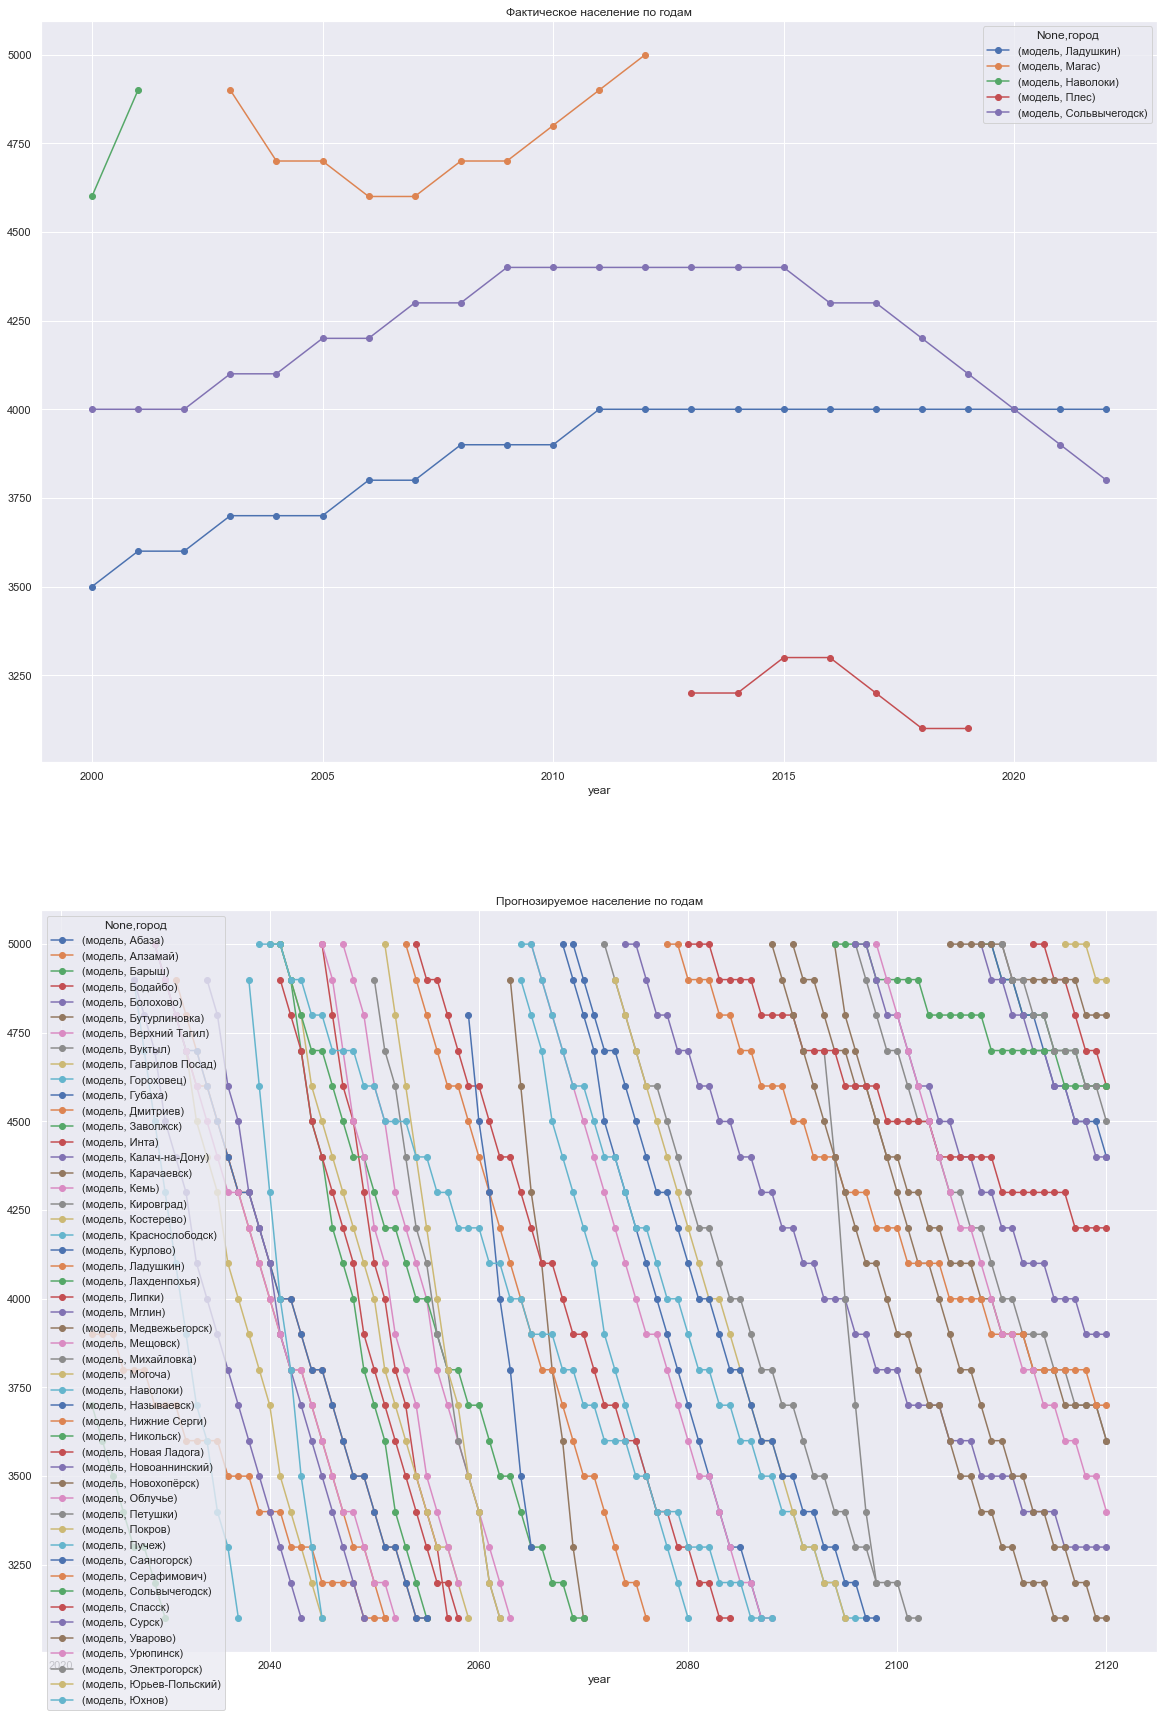

In [10]:
real_kp = real.query('group == "Крупное поселение"')
display('Настоящее время', real_kp)

future_kp = future.query('group == "Крупное поселение"')
display('Прогнозируемое', future_kp)

grafik(real_kp, future_kp)

В крупных поселениях тенденция сохраняется.

###  Поселение городского типа

'Настоящее время'

город  year   модель  нижняя граница  верхняя граница  \
2299     Бирюч  2000 7,700.00        7,600.00         7,700.00   
2300     Бирюч  2001 7,600.00        7,600.00         7,700.00   
2301     Бирюч  2002 7,600.00        7,500.00         7,600.00   
2302     Бирюч  2003 7,500.00        7,400.00         7,600.00   
2303     Бирюч  2004 7,500.00        7,400.00         7,500.00   
...        ...   ...      ...             ...              ...   
30147  Облучье  2018 9,800.00        9,400.00        10,100.00   
30148  Облучье  2019 9,700.00        9,400.00        10,000.00   
30149  Облучье  2020 9,600.00        9,300.00        10,000.00   
30150  Облучье  2021 9,500.00        9,200.00         9,800.00   
30151  Облучье  2022 9,400.00        9,000.00         9,700.00   

                           group  
2299   Поселение городского типа  
2300   Поселение городского типа  
2301   Поселение городского типа  
2302   Поселение городского типа  
2303   Поселение городского типа  
...                          ...  
30147  Поселение городского типа  
30148  Поселение городского типа  
30149  Поселение городского типа  
30150  Поселение городского типа  
30151  Поселение городского типа  

[643 rows x 6 columns]

'Прогнозируемое'

город  year   модель  нижняя граница  верхняя граница  \
2322     Бирюч  2023 7,800.00        7,700.00         7,800.00   
2323     Бирюч  2024 7,800.00        7,800.00         7,900.00   
2324     Бирюч  2025 7,900.00        7,900.00         8,000.00   
2325     Бирюч  2026 8,000.00        7,900.00         8,000.00   
2326     Бирюч  2027 8,100.00        8,000.00         8,100.00   
...        ...   ...      ...             ...              ...   
30169  Облучье  2040 5,900.00        5,600.00         6,300.00   
30170  Облучье  2041 5,700.00        5,400.00         6,100.00   
30171  Облучье  2042 5,600.00        5,200.00         5,900.00   
30172  Облучье  2043 5,400.00        5,000.00         5,800.00   
30173  Облучье  2044 5,200.00        4,800.00         5,600.00   

                           group  
2322   Поселение городского типа  
2323   Поселение городского типа  
2324   Поселение городского типа  
2325   Поселение городского типа  
2326   Поселение городского типа  
...                          ...  
30169  Поселение городского типа  
30170  Поселение городского типа  
30171  Поселение городского типа  
30172  Поселение городского типа  
30173  Поселение городского типа  

[2523 rows x 6 columns]

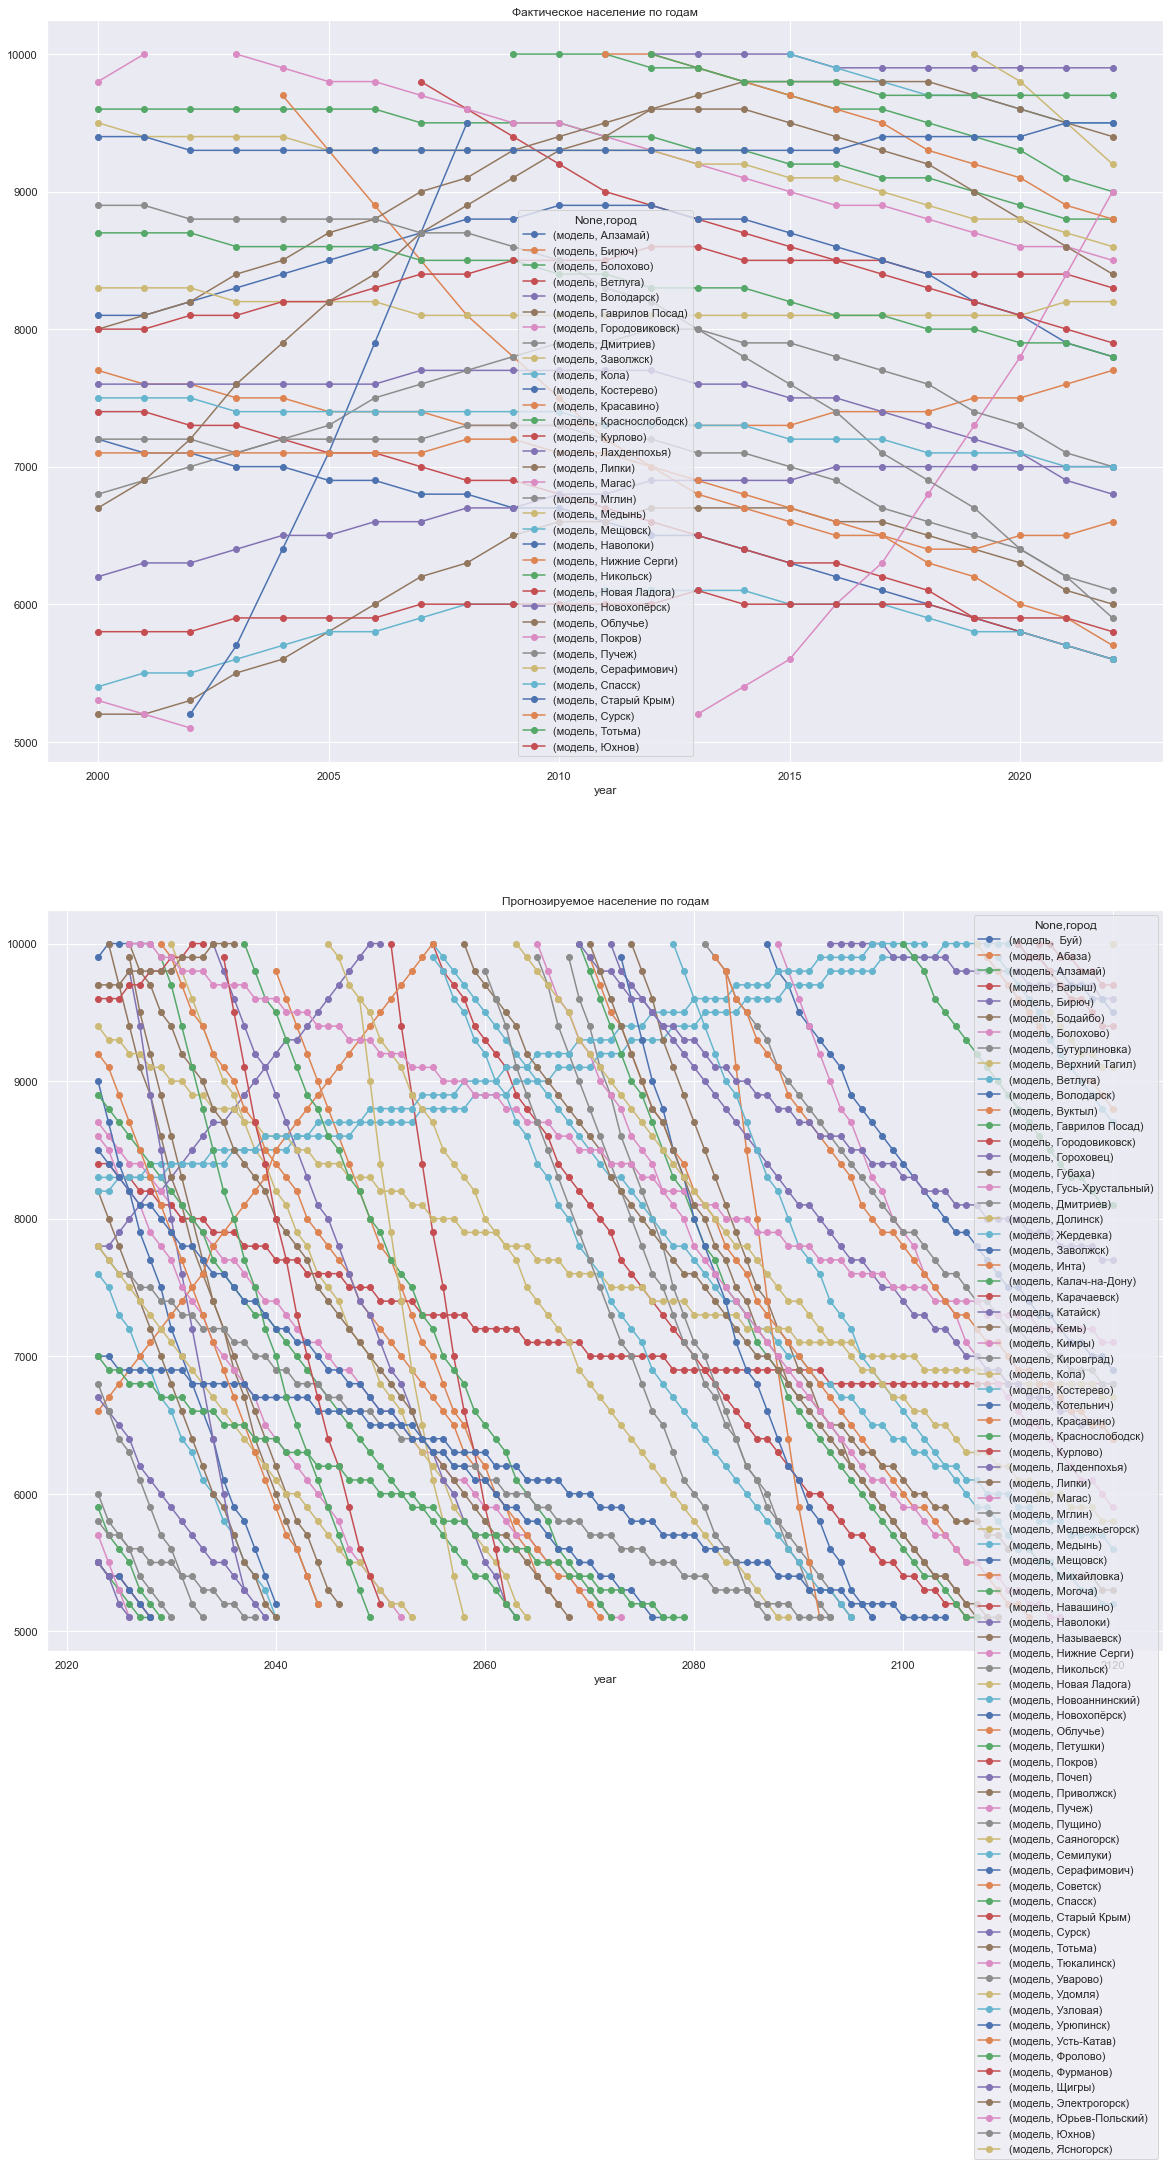

In [11]:
real_pgt = real.query('group == "Поселение городского типа"')
display('Настоящее время', real_pgt)

future_pgt = future.query('group == "Поселение городского типа"')
display('Прогнозируемое', future_pgt)

grafik(real_pgt, future_pgt)

1 В поселениях городского типа, по фактическим данным, появляется тенденция к сохранению численности.

2 В прогнозах появляются пункты с увеличением количества населения.

###  Малый город

'Настоящее время'

город  year    модель  нижняя граница  верхняя граница  \
0      Белокуриха  2000 15,400.00       15,100.00        15,700.00   
1      Белокуриха  2001 15,400.00       15,100.00        15,700.00   
2      Белокуриха  2002 15,400.00       15,000.00        15,700.00   
3      Белокуриха  2003 15,300.00       15,000.00        15,700.00   
4      Белокуриха  2004 15,300.00       14,900.00        15,600.00   
...           ...   ...       ...             ...              ...   
29180       Абаза  2019 15,200.00       15,000.00        15,400.00   
29181       Абаза  2020 15,000.00       14,800.00        15,200.00   
29182       Абаза  2021 14,700.00       14,500.00        14,900.00   
29183       Абаза  2022 14,400.00       14,200.00        14,600.00   
29282  Саяногорск  2000 20,000.00       17,500.00        22,800.00   

             group  
0      Малый город  
1      Малый город  
2      Малый город  
3      Малый город  
4      Малый город  
...            ...  
29180  Малый город  
29181  Малый город  
29182  Малый город  
29183  Малый город  
29282  Малый город  

[1182 rows x 6 columns]

'Прогнозируемое'

город  year    модель  нижняя граница  верхняя граница  \
23     Белокуриха  2023 15,400.00       15,100.00        15,800.00   
24     Белокуриха  2024 15,600.00       15,200.00        15,900.00   
25     Белокуриха  2025 15,700.00       15,300.00        16,000.00   
26     Белокуриха  2026 15,800.00       15,500.00        16,100.00   
27     Белокуриха  2027 15,900.00       15,600.00        16,200.00   
...           ...   ...       ...             ...              ...   
29325  Саяногорск  2043 13,800.00       11,300.00        16,800.00   
29326  Саяногорск  2044 12,800.00       10,300.00        15,900.00   
29327  Саяногорск  2045 11,900.00        9,400.00        15,000.00   
29328  Саяногорск  2046 11,100.00        8,600.00        14,200.00   
29329  Саяногорск  2047 10,300.00        7,900.00        13,500.00   

             group  
23     Малый город  
24     Малый город  
25     Малый город  
26     Малый город  
27     Малый город  
...            ...  
29325  Малый город  
29326  Малый город  
29327  Малый город  
29328  Малый город  
29329  Малый город  

[4846 rows x 6 columns]

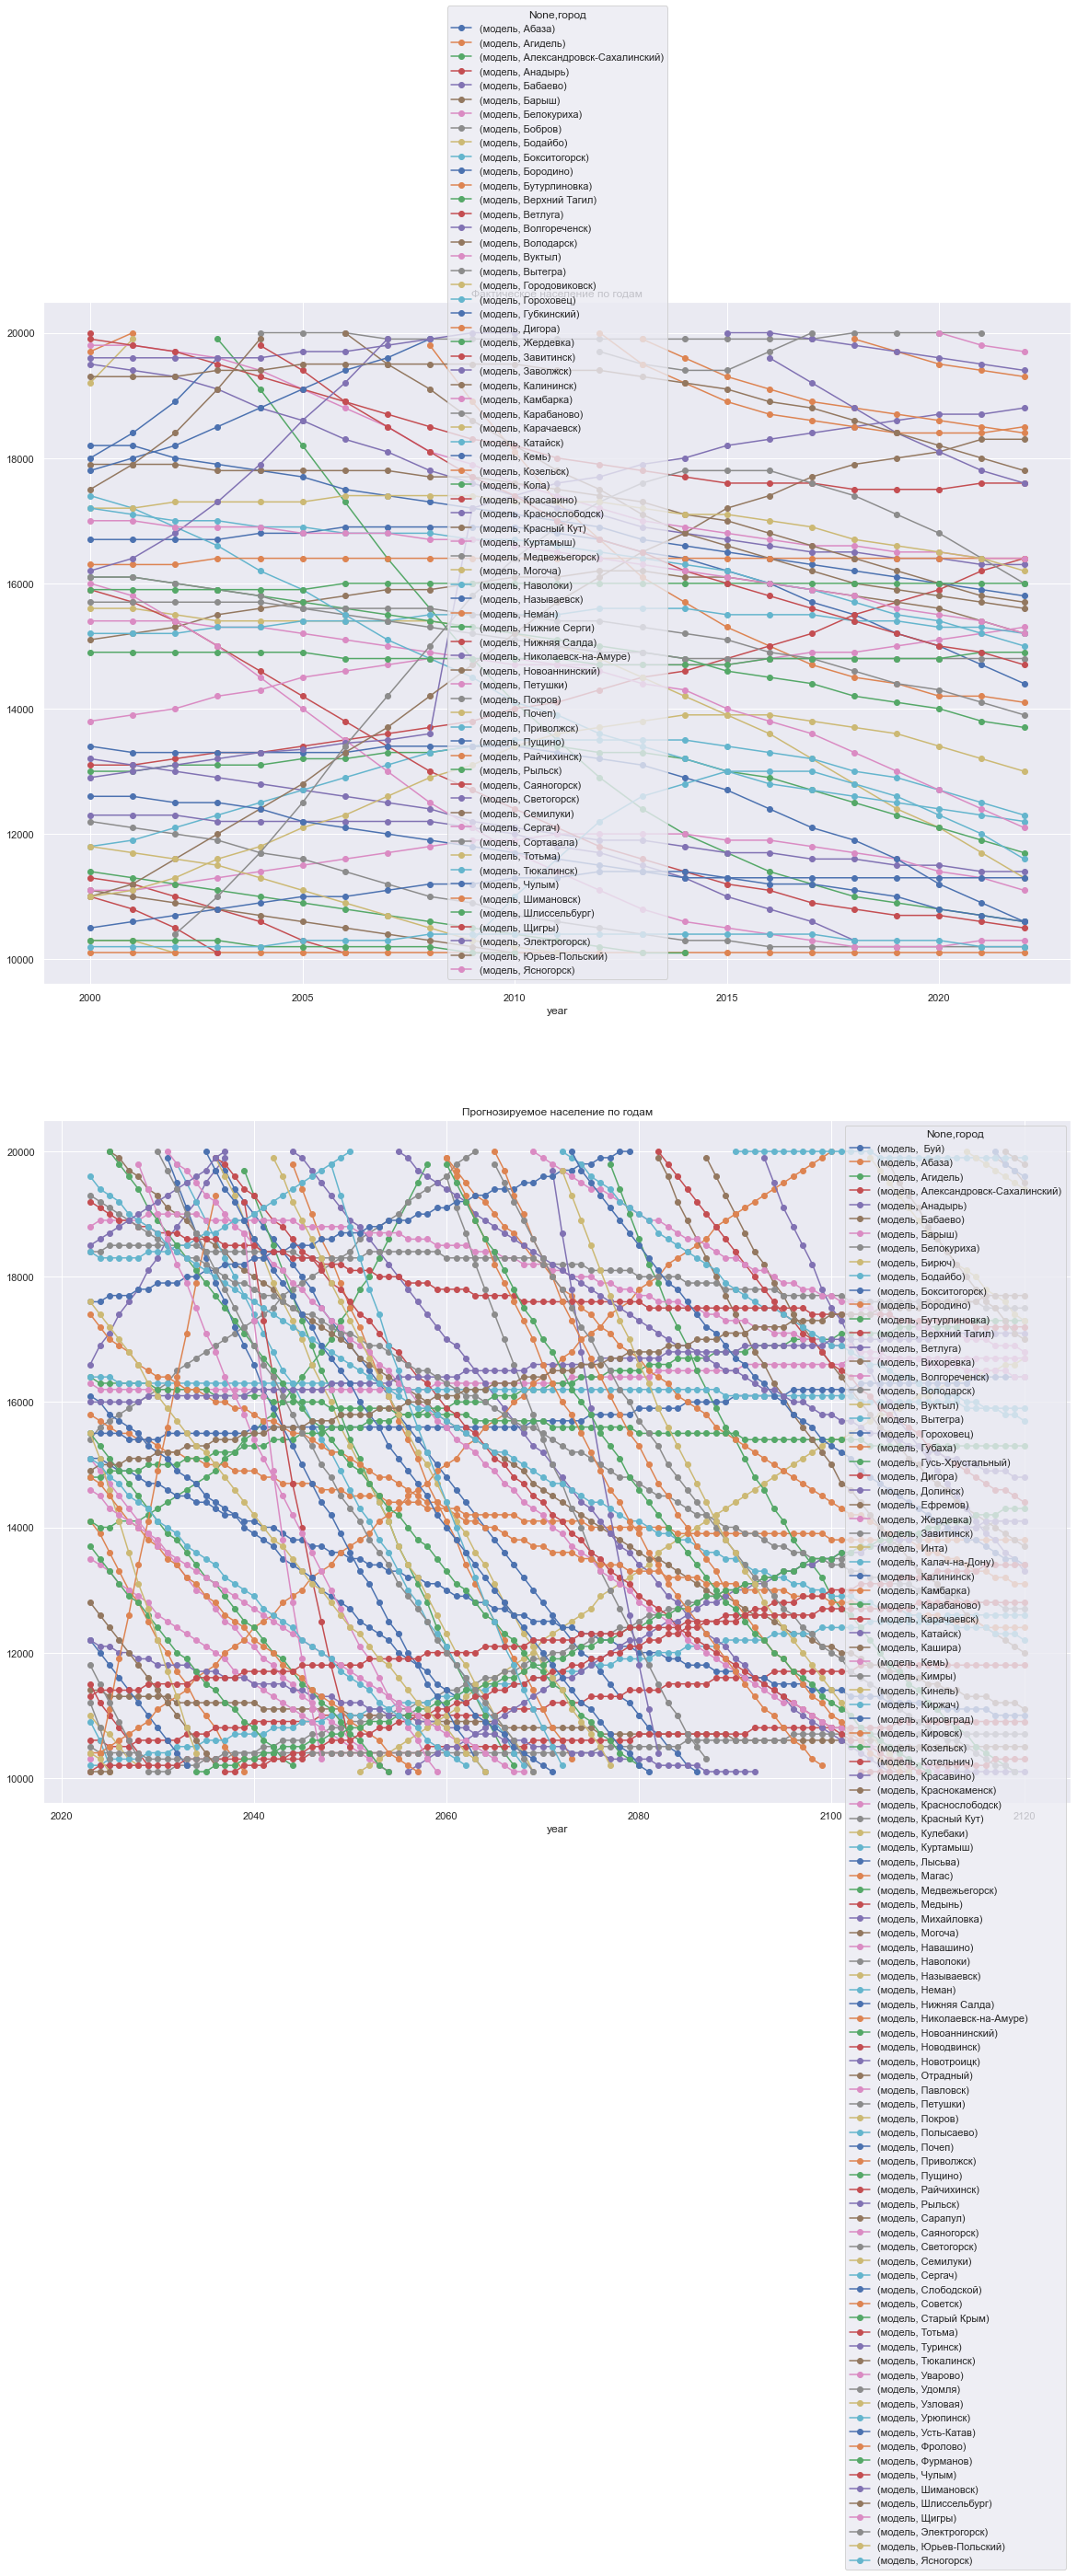

In [12]:
real_mg = real.query('group == "Малый город"')
display('Настоящее время', real_mg)

future_mg = future.query('group == "Малый город"')
display('Прогнозируемое', future_mg)

grafik(real_mg, future_mg)

Тенденция к увеличению колмчества растущих пунктов сохраняется.

###  Средний город

'Настоящее время'

город  year    модель  нижняя граница  верхняя граница  \
121    Новоалтайск  2000 69,800.00       68,900.00        70,800.00   
122    Новоалтайск  2001 70,100.00       69,100.00        71,000.00   
123    Новоалтайск  2002 70,400.00       69,500.00        71,300.00   
124    Новоалтайск  2003 70,700.00       69,800.00        71,600.00   
125    Новоалтайск  2004 70,900.00       70,000.00        71,800.00   
...            ...   ...       ...             ...              ...   
29905       Мирный  2018 34,800.00       34,300.00        35,300.00   
29906       Мирный  2019 34,800.00       34,400.00        35,300.00   
29907       Мирный  2020 35,000.00       34,500.00        35,500.00   
29908       Мирный  2021 35,200.00       34,700.00        35,700.00   
29909       Мирный  2022 35,400.00       34,900.00        35,900.00   

               group  
121    Средний город  
122    Средний город  
123    Средний город  
124    Средний город  
125    Средний город  
...              ...  
29905  Средний город  
29906  Средний город  
29907  Средний город  
29908  Средний город  
29909  Средний город  

[2645 rows x 6 columns]

'Прогнозируемое'

город  year    модель  нижняя граница  верхняя граница  \
64     Белокуриха  2064 20,200.00       19,800.00        20,500.00   
65     Белокуриха  2065 20,300.00       19,900.00        20,600.00   
66     Белокуриха  2066 20,400.00       20,100.00        20,800.00   
67     Белокуриха  2067 20,500.00       20,200.00        20,900.00   
68     Белокуриха  2068 20,700.00       20,300.00        21,000.00   
...           ...   ...       ...             ...              ...   
30003      Мирный  2116 68,600.00       67,400.00        69,800.00   
30004      Мирный  2117 68,800.00       67,600.00        70,000.00   
30005      Мирный  2118 69,000.00       67,800.00        70,200.00   
30006      Мирный  2119 69,200.00       68,000.00        70,400.00   
30007      Мирный  2120 69,400.00       68,200.00        70,600.00   

               group  
64     Средний город  
65     Средний город  
66     Средний город  
67     Средний город  
68     Средний город  
...              ...  
30003  Средний город  
30004  Средний город  
30005  Средний город  
30006  Средний город  
30007  Средний город  

[9436 rows x 6 columns]

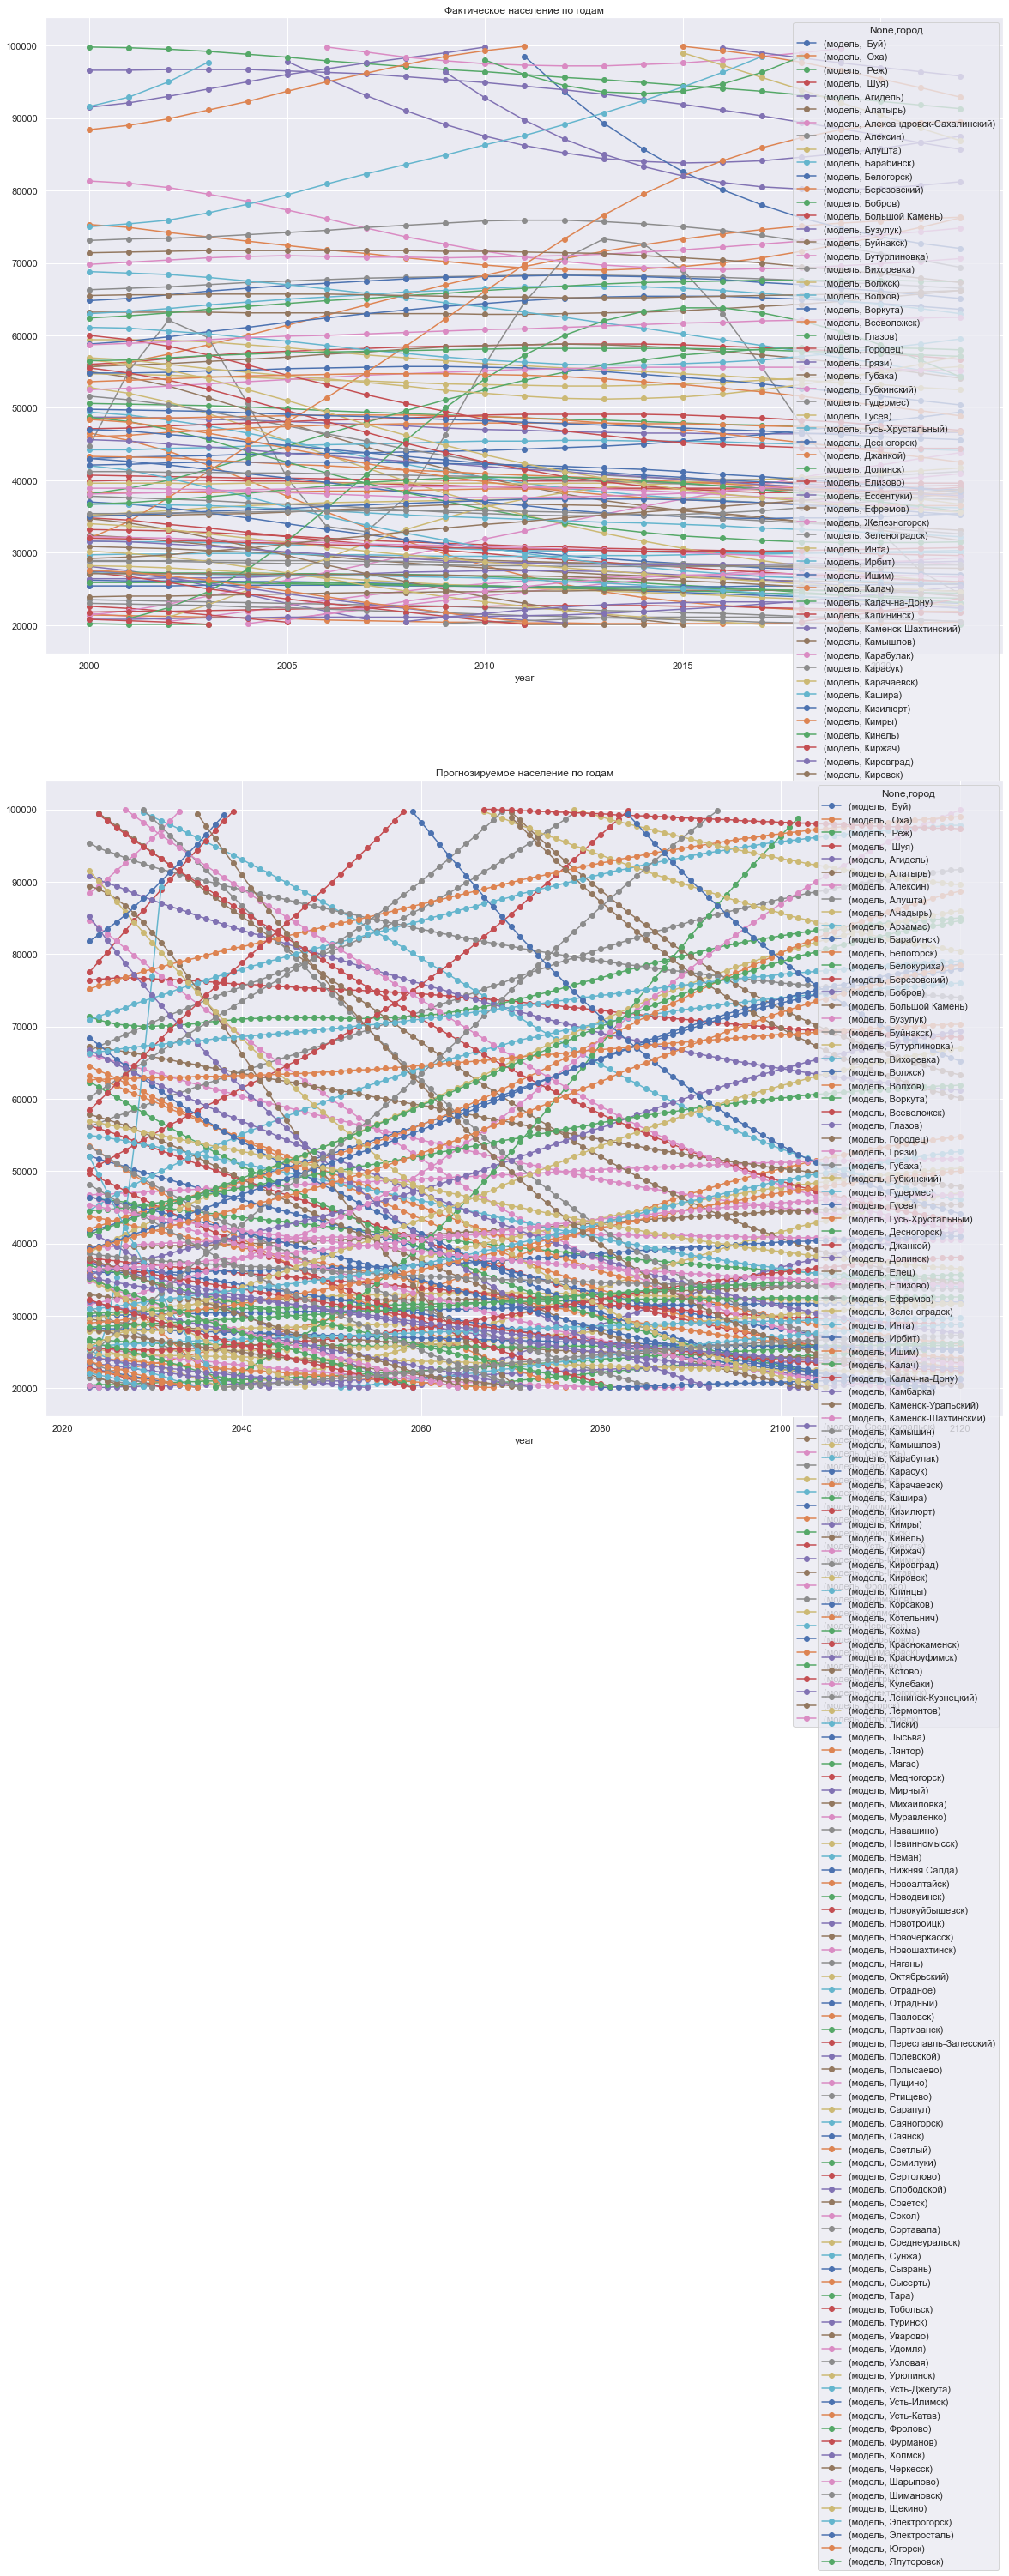

In [13]:
real_sg = real.query('group == "Средний город"')
display('Настоящее время', real_sg)

future_sg = future.query('group == "Средний город"')
display('Прогнозируемое', future_sg)

grafik(real_sg, future_sg)

Явно видно, что с увеличением населённого пункта увеличивается пунктов с положительным прогнозом.

### Крупный город

'Настоящее время'

город  year     модель  нижняя граница  верхняя граница          group
363     Анапа  2000 114,400.00      109,600.00       119,400.00  Крупный город
364     Анапа  2001 115,900.00      111,200.00       120,800.00  Крупный город
365     Анапа  2002 118,100.00      113,400.00       123,000.00  Крупный город
366     Анапа  2003 121,000.00      116,300.00       125,900.00  Крупный город
367     Анапа  2004 124,500.00      119,800.00       129,300.00  Крупный город
...       ...   ...        ...             ...              ...            ...
30026  Якутск  2018 326,200.00      325,800.00       326,700.00  Крупный город
30027  Якутск  2019 332,000.00      331,600.00       332,300.00  Крупный город
30028  Якутск  2020 337,900.00      337,700.00       338,200.00  Крупный город
30029  Якутск  2021 344,200.00      343,800.00       344,600.00  Крупный город
30030  Якутск  2022 350,700.00      350,200.00       351,100.00  Крупный город

[985 rows x 6 columns]

'Прогнозируемое'

город  year     модель  нижняя граница  верхняя граница          group
386     Анапа  2023 214,200.00      210,000.00       218,500.00  Крупный город
387     Анапа  2024 220,000.00      215,800.00       224,300.00  Крупный город
388     Анапа  2025 225,800.00      221,500.00       230,100.00  Крупный город
389     Анапа  2026 231,500.00      227,100.00       235,900.00  Крупный город
390     Анапа  2027 237,100.00      232,700.00       241,600.00  Крупный город
...       ...   ...        ...             ...              ...            ...
30049  Якутск  2041 473,500.00      471,200.00       475,700.00  Крупный город
30050  Якутск  2042 479,500.00      477,200.00       481,800.00  Крупный город
30051  Якутск  2043 485,500.00      483,100.00       488,000.00  Крупный город
30052  Якутск  2044 491,700.00      489,200.00       494,200.00  Крупный город
30053  Якутск  2045 497,900.00      495,300.00       500,500.00  Крупный город

[3598 rows x 6 columns]

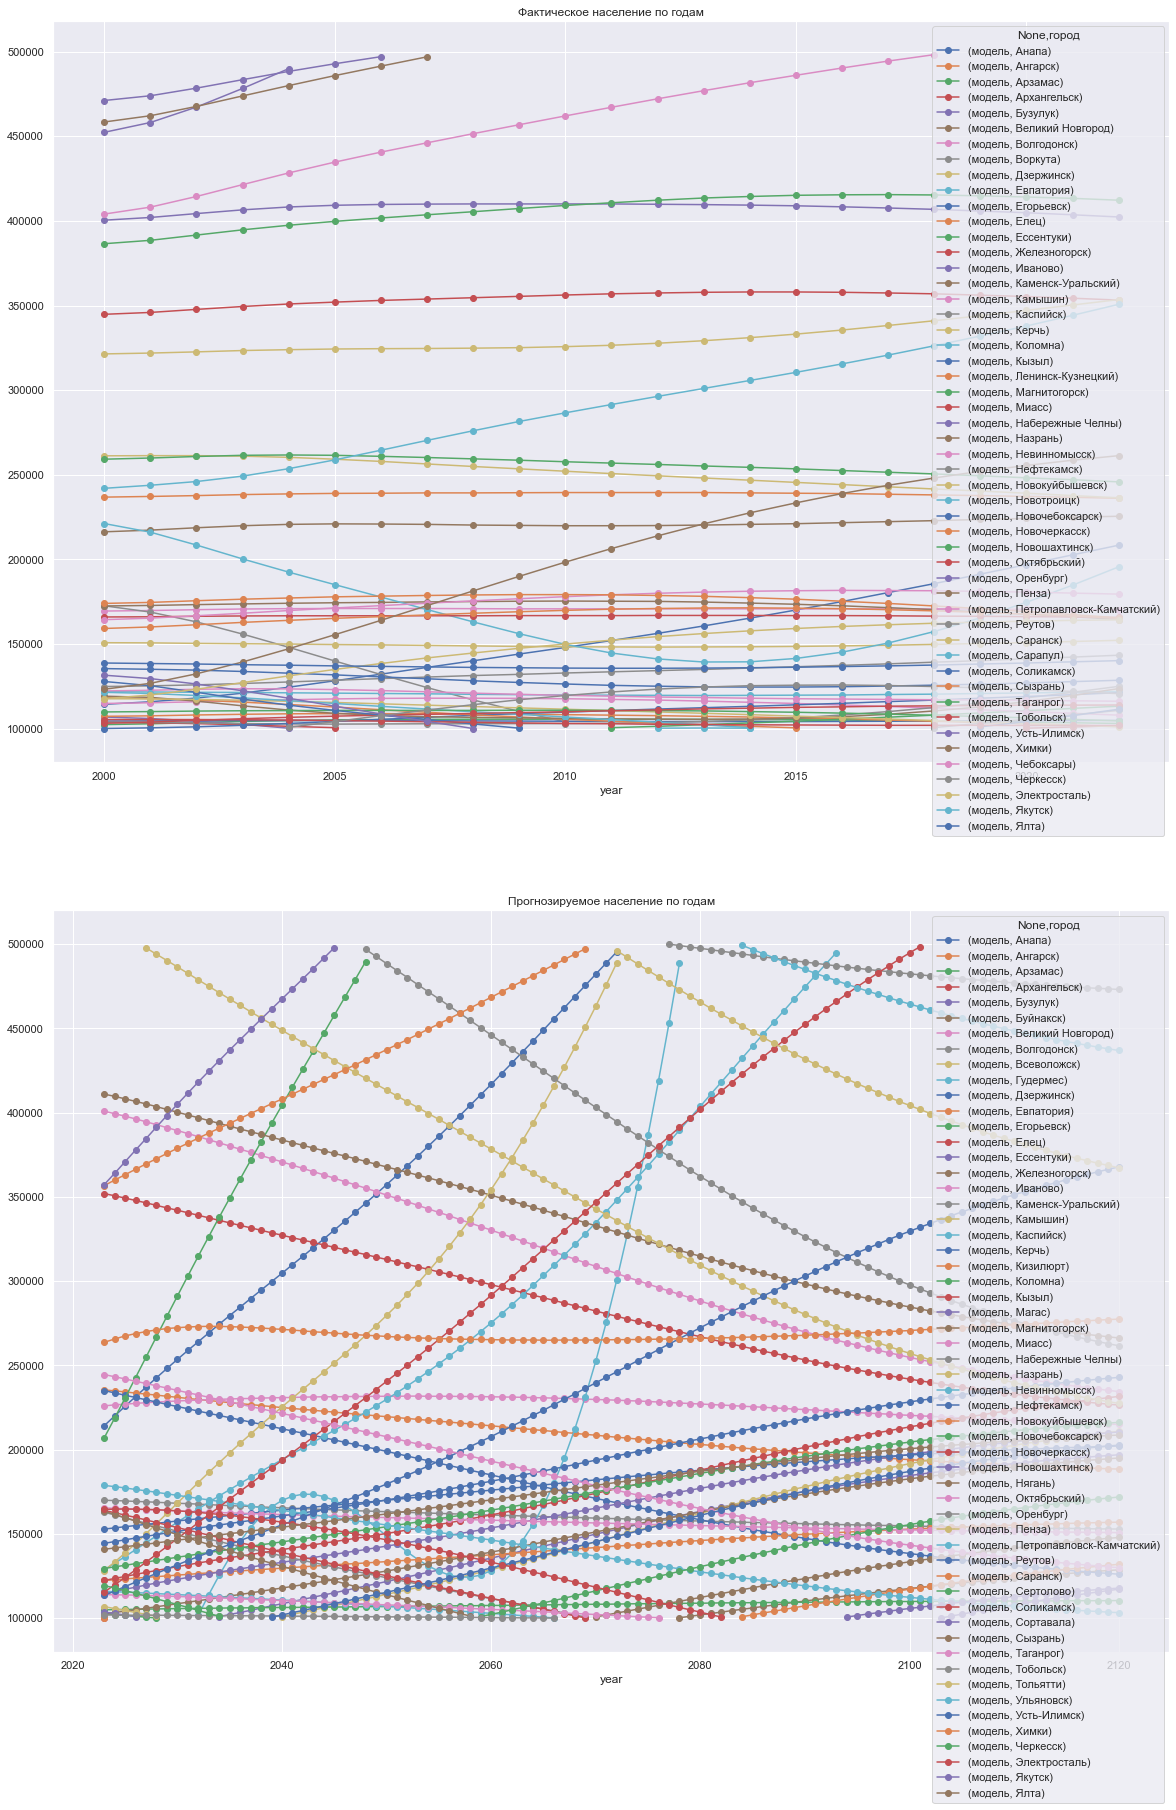

In [14]:
real_kg = real.query('group == "Крупный город"')
display('Настоящее время', real_kg)

future_kg = future.query('group == "Крупный город"')
display('Прогнозируемое', future_kg)

grafik(real_kg, future_kg)

Тенденция сохраняется

###  Крупнейший город

'Настоящее время'

город  year     модель  нижняя граница  верхняя граница  \
242           Краснодар  2000 593,700.00      578,100.00       609,800.00   
243           Краснодар  2001 605,900.00      590,200.00       621,900.00   
244           Краснодар  2002 624,600.00      608,900.00       640,600.00   
245           Краснодар  2003 647,100.00      631,400.00       663,100.00   
246           Краснодар  2004 671,300.00      655,600.00       687,300.00   
...                 ...   ...        ...             ...              ...   
28578  Набережные Челны  2022 533,400.00      531,700.00       535,100.00   
29543         Чебоксары  2019 501,800.00      497,700.00       505,900.00   
29544         Чебоксары  2020 505,200.00      501,100.00       509,300.00   
29545         Чебоксары  2021 508,400.00      504,300.00       512,500.00   
29546         Чебоксары  2022 511,300.00      507,300.00       515,500.00   

                  group  
242    Крупнейший город  
243    Крупнейший город  
244    Крупнейший город  
245    Крупнейший город  
246    Крупнейший город  
...                 ...  
28578  Крупнейший город  
29543  Крупнейший город  
29544  Крупнейший город  
29545  Крупнейший город  
29546  Крупнейший город  

[172 rows x 6 columns]

'Прогнозируемое'

город  year     модель  нижняя граница  верхняя граница  \
436     Анапа  2073 502,100.00      495,800.00       508,400.00   
437     Анапа  2074 508,700.00      502,400.00       515,100.00   
438     Анапа  2075 515,300.00      508,900.00       521,700.00   
439     Анапа  2076 521,900.00      515,500.00       528,300.00   
440     Анапа  2077 528,400.00      522,000.00       534,900.00   
...       ...   ...        ...             ...              ...   
30099  Якутск  2091 947,300.00      940,400.00       954,200.00   
30100  Якутск  2092 958,100.00      951,100.00       965,200.00   
30101  Якутск  2093 968,900.00      961,800.00       976,000.00   
30102  Якутск  2094 979,500.00      972,300.00       986,700.00   
30103  Якутск  2095 989,900.00      982,700.00       997,300.00   

                  group  
436    Крупнейший город  
437    Крупнейший город  
438    Крупнейший город  
439    Крупнейший город  
440    Крупнейший город  
...                 ...  
30099  Крупнейший город  
30100  Крупнейший город  
30101  Крупнейший город  
30102  Крупнейший город  
30103  Крупнейший город  

[844 rows x 6 columns]

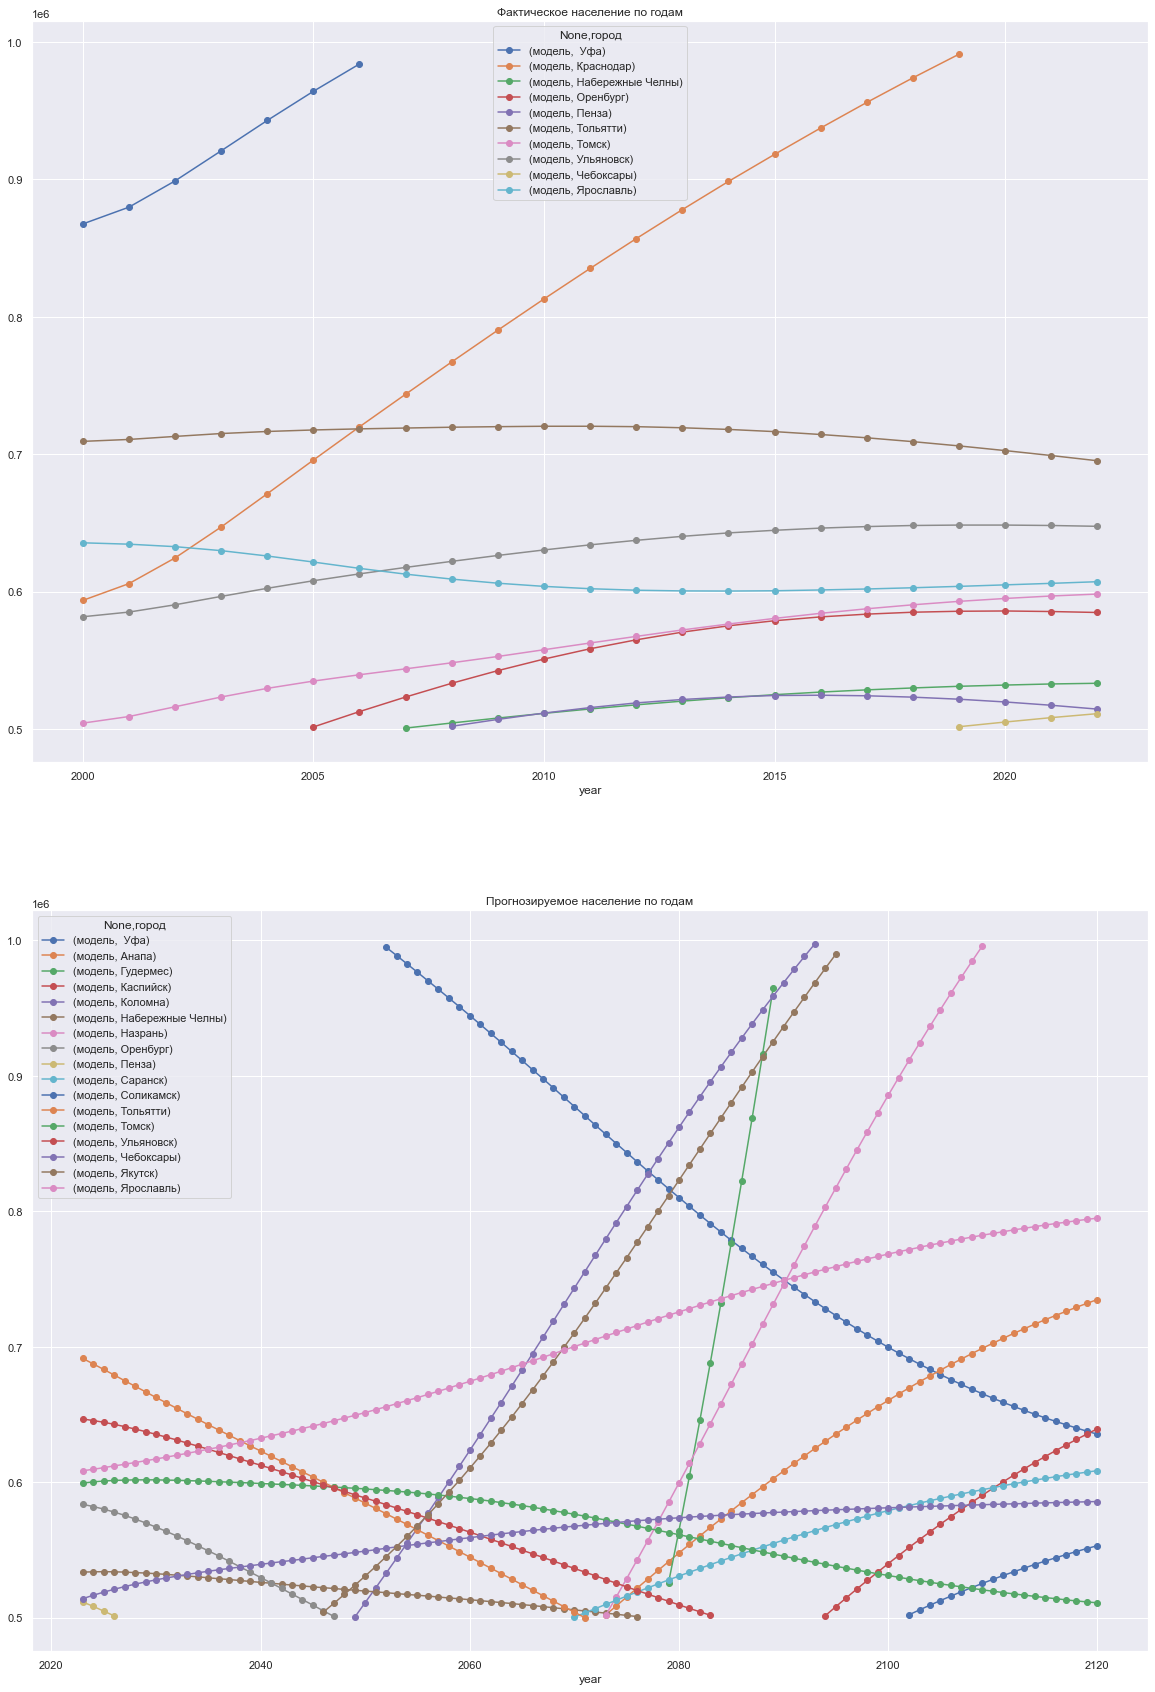

In [15]:
real_krg = real.query('group == "Крупнейший город"')
display('Настоящее время', real_krg)

future_krg = future.query('group == "Крупнейший город"')
display('Прогнозируемое', future_krg)

grafik(real_krg, future_krg)

Тенденция сохраняется

###  Миллионники

'Настоящее время'

город  year        модель  нижняя граница  верхняя граница  \
262    Краснодар  2020  1,007,800.00      992,000.00     1,023,800.00   
263    Краснодар  2021  1,023,800.00    1,008,000.00     1,039,800.00   
264    Краснодар  2022  1,039,100.00    1,023,300.00     1,055,200.00   
15730     Москва  2000  9,702,100.00    9,649,900.00     9,754,500.00   
15731     Москва  2001  9,795,700.00    9,744,400.00     9,847,300.00   
15732     Москва  2002  9,941,100.00    9,890,500.00     9,991,900.00   
15733     Москва  2003 10,118,600.00   10,068,800.00    10,168,700.00   
15734     Москва  2004 10,311,800.00   10,262,800.00    10,361,000.00   
15735     Москва  2005 10,509,700.00   10,461,400.00    10,558,100.00   
15736     Москва  2006 10,704,800.00   10,657,400.00    10,752,500.00   
15737     Москва  2007 10,895,100.00   10,848,500.00    10,942,000.00   
15738     Москва  2008 11,079,300.00   11,033,500.00    11,125,400.00   
15739     Москва  2009 11,257,000.00   11,211,900.00    11,302,300.00   
15740     Москва  2010 11,426,300.00   11,382,000.00    11,470,800.00   
15741     Москва  2011 11,586,800.00   11,543,300.00    11,630,400.00   
15742     Москва  2012 11,737,800.00   11,695,100.00    11,780,700.00   
15743     Москва  2013 11,879,600.00   11,837,700.00    11,921,700.00   
15744     Москва  2014 12,011,400.00   11,970,300.00    12,052,700.00   
15745     Москва  2015 12,134,200.00   12,093,900.00    12,174,700.00   
15746     Москва  2016 12,248,500.00   12,209,000.00    12,288,200.00   
15747     Москва  2017 12,355,300.00   12,316,600.00    12,394,200.00   
15748     Москва  2018 12,454,600.00   12,416,600.00    12,492,700.00   
15749     Москва  2019 12,547,200.00   12,510,000.00    12,584,500.00   
15750     Москва  2020 12,633,600.00   12,597,200.00    12,670,100.00   
15751     Москва  2021 12,714,500.00   12,677,300.00    12,751,800.00   
15752     Москва  2022 12,789,500.00   12,751,600.00    12,827,600.00   
25901        Уфа  2007  1,002,800.00      999,900.00     1,005,800.00   
25902        Уфа  2008  1,020,900.00    1,018,000.00     1,023,700.00   
25903        Уфа  2009  1,038,100.00    1,035,400.00     1,040,800.00   
25904        Уфа  2010  1,054,300.00    1,051,700.00     1,056,900.00   
25905        Уфа  2011  1,069,300.00    1,066,800.00     1,071,700.00   
25906        Уфа  2012  1,082,800.00    1,080,500.00     1,085,200.00   
25907        Уфа  2013  1,094,900.00    1,092,700.00     1,097,100.00   
25908        Уфа  2014  1,105,300.00    1,103,200.00     1,107,300.00   
25909        Уфа  2015  1,114,100.00    1,112,200.00     1,116,000.00   
25910        Уфа  2016  1,121,400.00    1,119,600.00     1,123,200.00   
25911        Уфа  2017  1,127,300.00    1,125,600.00     1,128,900.00   
25912        Уфа  2018  1,131,800.00    1,130,300.00     1,133,300.00   
25913        Уфа  2019  1,135,200.00    1,133,800.00     1,136,500.00   
25914        Уфа  2020  1,137,400.00    1,136,100.00     1,138,600.00   
25915        Уфа  2021  1,138,600.00    1,137,200.00     1,140,000.00   
25916        Уфа  2022  1,138,900.00    1,137,400.00     1,140,400.00   

             group  
262    Миллионники  
263    Миллионники  
264    Миллионники  
15730  Миллионники  
15731  Миллионники  
15732  Миллионники  
15733  Миллионники  
15734  Миллионники  
15735  Миллионники  
15736  Миллионники  
15737  Миллионники  
15738  Миллионники  
15739  Миллионники  
15740  Миллионники  
15741  Миллионники  
15742  Миллионники  
15743  Миллионники  
15744  Миллионники  
15745  Миллионники  
15746  Миллионники  
15747  Миллионники  
15748  Миллионники  
15749  Миллионники  
15750  Миллионники  
15751  Миллионники  
15752  Миллионники  
25901  Миллионники  
25902  Миллионники  
25903  Миллионники  
25904  Миллионники  
25905  Миллионники  
25906  Миллионники  
25907  Миллионники  
25908  Миллионники  
25909  Миллионники  
25910  Миллионники  
25911  Миллионники  
25912  Миллионники  
25913  Миллионники  
25914  Миллионники  
25915  Мил

'Прогнозируемое'

город  year       модель  нижняя граница  верхняя граница  \
265    Краснодар  2023 1,053,800.00    1,038,000.00     1,069,800.00   
266    Краснодар  2024 1,067,700.00    1,051,900.00     1,083,800.00   
267    Краснодар  2025 1,081,100.00    1,065,300.00     1,097,100.00   
268    Краснодар  2026 1,093,800.00    1,077,900.00     1,109,800.00   
269    Краснодар  2027 1,105,800.00    1,090,000.00     1,121,800.00   
...          ...   ...          ...             ...              ...   
30124     Якутск  2116 1,171,900.00    1,162,600.00     1,181,100.00   
30125     Якутск  2117 1,178,500.00    1,169,200.00     1,187,900.00   
30126     Якутск  2118 1,185,000.00    1,175,500.00     1,194,400.00   
30127     Якутск  2119 1,191,200.00    1,181,700.00     1,200,800.00   
30128     Якутск  2120 1,197,300.00    1,187,700.00     1,206,900.00   

             group  
265    Миллионники  
266    Миллионники  
267    Миллионники  
268    Миллионники  
269    Миллионники  
...            ...  
30124  Миллионники  
30125  Миллионники  
30126  Миллионники  
30127  Миллионники  
30128  Миллионники  

[319 rows x 6 columns]

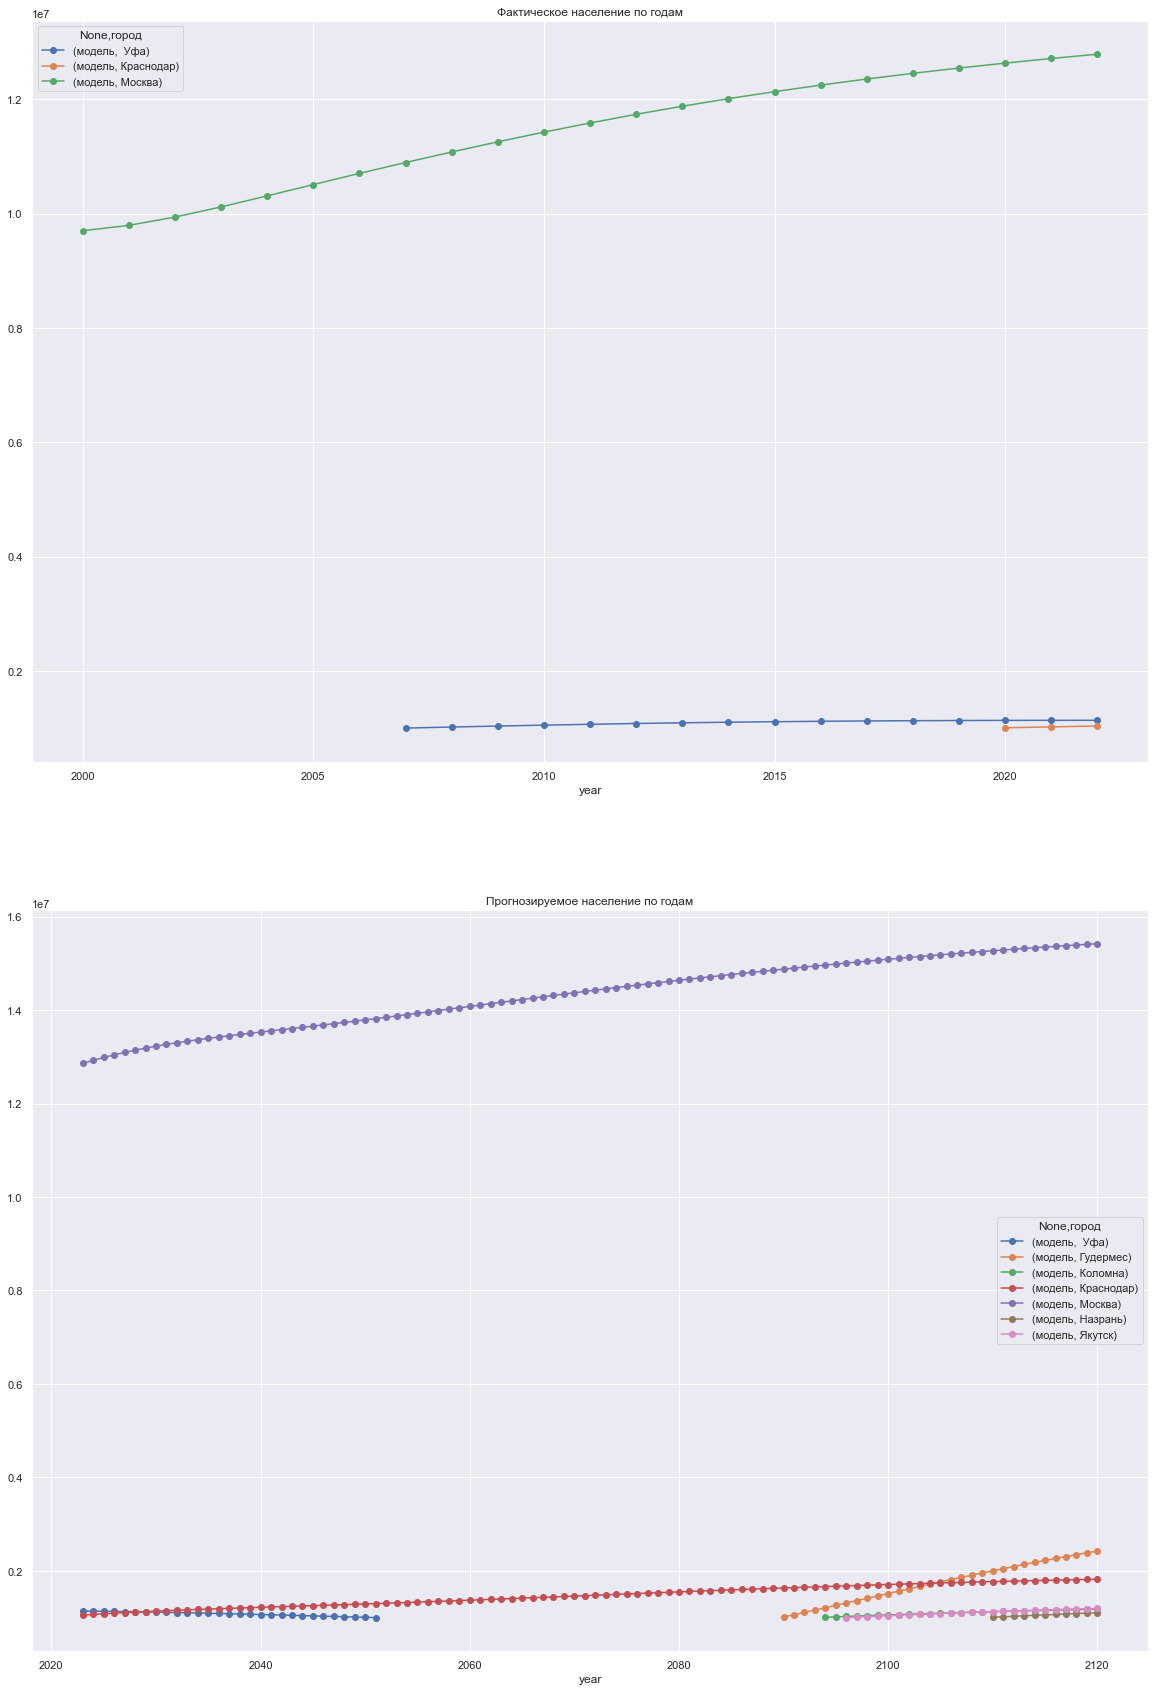

In [16]:
real_mll = real.query('group == "Миллионники"')
display('Настоящее время', real_mll)

future_mll = future.query('group == "Миллионники"')
display('Прогнозируемое', future_mll)

grafik(real_mll, future_mll)

Самый динамически развивающийся город Москва

## Вывод

По данному иследованию видно, что маленькие населённые пункты идут практически к вымиранию. Люди стремятся в более крупные крупные, индустриальные города. В таких городах проще найти работу, выше заработная плата.
Москва по приросту населения в не конкуренции.

Интересно было бы получить фактические данные по численности и провести сравнение с моделью. 

Так же найти наиболее динамически развивающиеся населённые пункты.


